In [65]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv("esca.csv", sep=";", decimal=",")
time = data["Time"]
x = data["Trajectoire 1/0/X"]
y = data["Trajectoire 1/0/Y"]
data

,Time,Trajectoire 1/0/X,Trajectoire 1/0/Y
0,0.000,3.400378,99.75145
1,0.033,2.569415,99.76045
2,0.067,1.738101,99.76656
3,0.100,0.900495,99.76573
4,0.133,-0.751579,99.76957
...,...,...,...
4487,149.500,-32.979060,88.43159
4488,149.533,-32.982800,89.27429
4489,149.567,-33.804200,90.11417
4490,149.600,-33.798000,91.76159


In [76]:
# j'identifie la montée et la descente en obtenant les index de la coordonnées y (axe vertical) la plus haute atteinte.
i_max = np.where(y == np.max(y))[0][-1]
i_max

np.int64(3897)

In [77]:
y.iloc[i_max]

np.float64(503.0424)

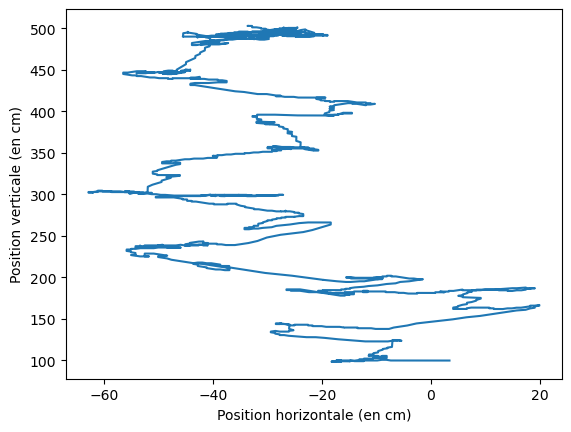

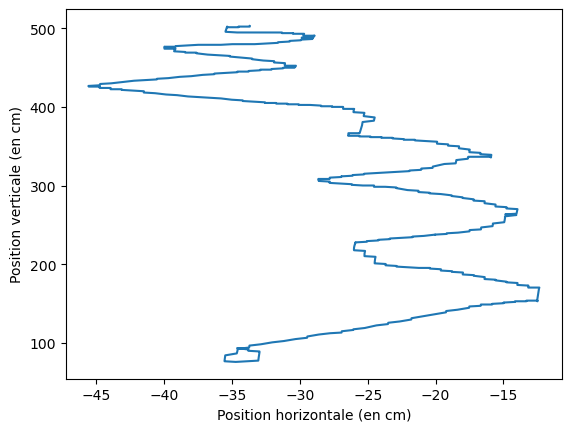

In [69]:
w

## La vitesse

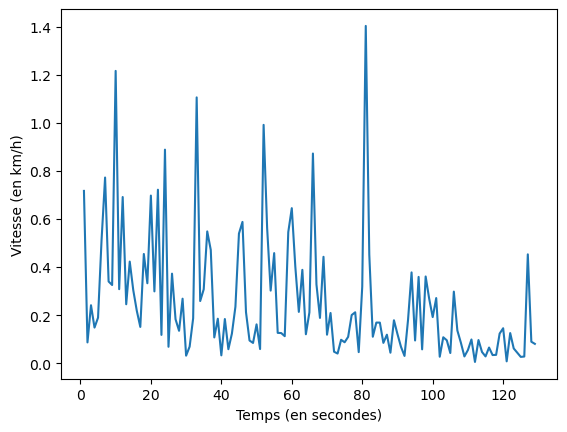

np.float64(0.2571500349677964)

In [70]:
i = 0
vitesses_par_secondes = []
time_v= []
while i <= i_max-30:
    time_a, x_a, y_a = data.iloc[i]
    time_b, x_b, y_b = data.iloc[i+30]
    dist_en_cm = np.sqrt((x_b-x_a)**2+(y_b-y_a)**2)
    vitesses_par_secondes.append(dist_en_cm/(time_b-time_a)) # vitesse en cm/s
    time_v.append(time.iloc[i+30])
    i+=30

plt.plot(time_v, np.array(vitesses_par_secondes)*0.036)
plt.xlabel("Temps (en secondes)")
plt.ylabel("Vitesse (en km/h)")
plt.savefig("speed.svg")
plt.show()

np.mean(np.array(vitesses_par_secondes))*0.036 # vitesse moyenne en km/h

## Temps d'escalade

In [78]:
time[i_max]

np.float64(129.842)

## Ratio temps de mouvements sur temps d'immobilité

In [72]:
def isclose(a, b, trsh):
    return abs(a-b)<trsh
trsh = 1
index_deb = time[(isclose(time, 38.62, trsh))]
index_fin = time[(isclose(time, 44.95, trsh))]
while len(index_deb) > 1:
    trsh/=10
    index_deb = time[(isclose(time, 38.62, trsh))]
trsh = 1
while len(index_fin) > 1:
    trsh/=10
    index_fin = time[(isclose(time, 44.95, trsh))]
index_deb = index_deb.index[0]
index_fin = index_fin.index[0]
index_deb, index_fin

(np.int64(1159), np.int64(1349))

In [79]:
i = 0
dist_imo = []
while i < len(data[index_deb:(index_fin+1)])-30:
    time_a, x_a, y_a = data.iloc[i]
    time_b, x_b, y_b = data.iloc[i+30]
    dist_imo.append((np.sqrt((x_b-x_a)**2+(y_b-y_a)**2)))
    i+=30
trsh = np.mean(np.array(dist_imo))
trsh

np.float64(8.770730696971876)

In [74]:
i = 0
mouvement = []
while i <= (len(time)-30):
    time_a, x_a, y_a = data.iloc[i]
    time_b, x_b, y_b = data.iloc[i+30]
    dist_en_cm = (np.sqrt((x_b-x_a)**2+(y_b-y_a)**2))
    if dist_en_cm > trsh:
        mouvement.append(True)
    else:
        mouvement.append(False)
    i+=30

mouvement_def = []
for j in mouvement:
    for k in range(30):
        mouvement_def.append(j)

if i < len(time):
    diff = len(time)-i
    for _ in range(diff):
        mouvement_def.append(mouvement_def[-1])
        
f"{round(((len(time[(np.array(mouvement_def))])*0.033)-0.033)/(time[3432])*100, 2)} %"

'46.49 %'

In [80]:
(np.mean(np.array(vitesses_par_secondes))/100)*(time[i_max])

np.float64(9.27468745563573)